In [3]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# allow plots to appear directly in the notebook
%matplotlib inline

The dataset consists of the sales of products and their advertising budget in three different media TV, radio, newspaper.

In [5]:
# read data into a DataFrame
# Load CSV and columns
df = pd.read_csv("data/Advertising.csv", index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
# shape of the DataFrame
df.shape

(200, 4)

Visualizing the relationship between the features and the response using scatterplots:

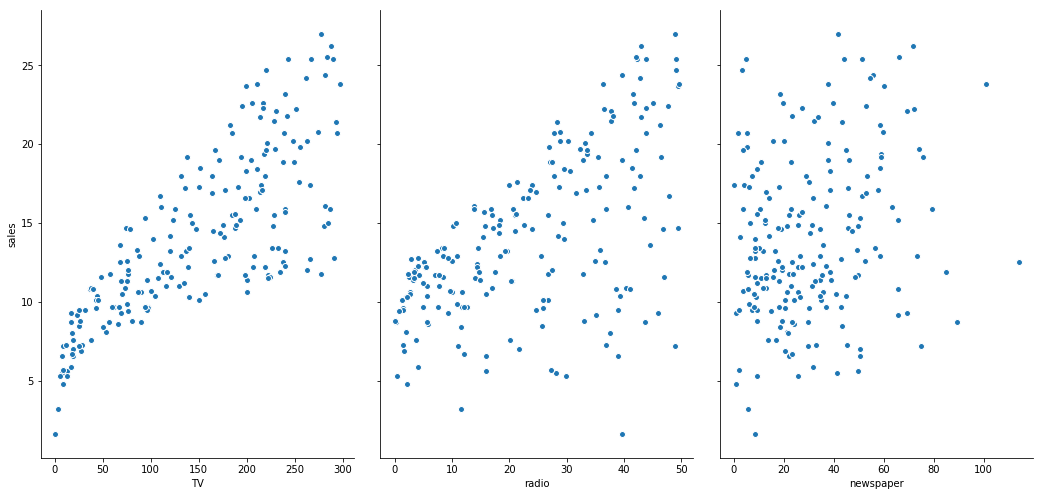

In [7]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7)

## Questions about the Advertising Data
Let's pretend you work for the company that manufactures and markets this widget
The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?
This general question might lead you to more specific questions:
    - Is there a relationship between ads and sales?
    - How strong is that relationship?
    - Which ad types contribute to sales?
    - What is the effect of each ad type of sales?
    - Given ad spending in a particular market, can sales be predicted?

Exploring of these questions is below:

### Estimating (Learning) Model Coefficients

- Coefficients are estimated using the least squares criterion(by minimizing the sum of squared residuals (sum of squared errors))


In [8]:
#Estimating with STATSMODELS 

# create a fitted model (Ordinary least squares)
lm1 = smf.ols(formula='sales ~ TV', data=df).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [10]:
# Estimating with SCIKIT-LEARN

# create X and y
feature_cols = ['TV']
X = df[feature_cols]
y = df.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.03259354913
[ 0.04753664]


## Interpreting Model Coefficients

- A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales. 
- Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets
- Note here that the coefficients represent associations, not causations


## Predicting with the Model
Let's say that there was a new market where the TV advertising spend was $50,000. 
What would we predict for the Sales in that market?
y = 7.032594 + 0.047537 × 50
We would use 50 instead of 50,000 because the original data consists of examples that are divided by 1000


In [15]:
# manually calculate the prediction
7.032594 + 0.047537*50



9.409444

In [11]:
# Prediction with STATSMODELS 

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

# predict(x) method, given unlabeled observations x, returns the predicted labels y




0    9.409426
dtype: float64

In [12]:
# Predicting with SCIKIT-LEARN 

# predict for a new observation
lm2.predict(50)



array([ 9.40942557])

The Sales of widgets in that market are predicted to be 9,409

## Plotting the Least Squares Line

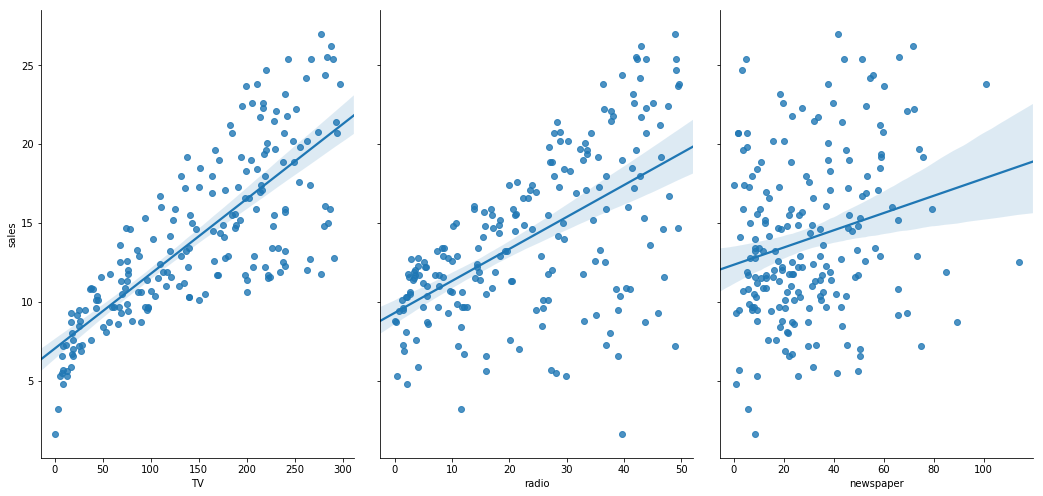

In [23]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

## Confidence in our Model

Question: is linear regression a high variance/low bias model, or a low variance/high bias model?

**Answer:**
- Low variance/high bias
- Under repeated sampling, the line will stay roughly in the same place (low variance)
    - But the average of those models won't do a great job capturing the true relationship (high bias)
- Note that low variance is a useful characteristic when you don't have a lot of training data

A closely related concept is confidence intervals
- Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows:
    - If the population from which this sample was drawn was sampled 100 times
        - Approximately 95 of those confidence intervals would contain the "true" coefficient



In [10]:
# STATSMODELS 

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


- We only have a single sample of data, and not the entire population of data
- The "true" coefficient is either within this interval or it isn't, but there's no way to actually know
- We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is probably within

Note that using 95% confidence intervals is just a convention
- You can create 90% confidence intervals (which will be more narrow)
- 99% confidence intervals (which will be wider)
- or whatever intervals you like.

## Hypothesis Testing and p-values
### Hypothesis Testing steps
1. Start with a Null hypothesis (H0) and an alternative hypothesis (Ha)
2. Then you check whether the data supports rejecting the H0 or failing to reject the H0
    -"failing to reject" the H0 is not the same as "accepting" the H0
    -The Ha may be true, except that you don't have enough data to show that

### Conventional hypothesis test
- H0: there is no relationships between TV ads and Sales (b1 = 0)
- Ha: There is a relationship between TV ads and Sales (b1 != 0)

### Testing hypothesis
- Reject the null
    - There is a relationship
    - If the 95% confidence interval does not include 0
- Fail to reject the zero
    - There is no relationship
    - If the 95% confidence interval includes zero

In [12]:
# STATSMODELS 

# print the p-values for the model coefficients
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

### p-value
    - Represents the probability that the coefficient is actually zero
Interpreting p-values
    - If the 95% confidence interval (a range of values defined so that there is a probability that the value of a parameter lies within it) does not include zero
        - p-value will be less than 0.05
        - Reject the null
        - There is a relationship
    - If the 95% confidence interval includes zero
        - p-value for that coefficient will be greater than 0.05
        - Fail to reject the null
        - There is no relationship
Notes
    - p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the
response
    - In this case, the p-value for TV is far less than 0.05
        - Low probability coefficient actually zero
        - Reject null hypothesis
        - There is a relationship
        - Believe that there is a relationship between TV ads and Sales
    - We generally ignore the p-value for the intercept

## How Well Does the Model Fit the data?

To evaluate the overall fit of a linear model, we use the R-squared value
    - R-squared is the proportion of variance explained
        - It is the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model
            -The null model just predicts the mean of the observed response, and thus it has an intercept and no slope
    - R-squared is between 0 and 1
        -Higher values are better because it means that more variance is explained by the model.

Let's calculate the R-squared value for our simple linear method:

In [14]:
# Calculating R squared using STATSMODELS 

# print the R-squared value for the model
lm1.rsquared

0.61187505085007099

In [15]:
# Calculating R squared using SCIKIT-LEARN 

# print the R-squared value for the model
lm2.score(X, y)

0.61187505085007099

Is that a "good" R squared value? 
    - It's hard to say
    - The threshold for a good R-squared value depends widely on the domain
    - Therefore, it's most useful as a tool for comparing different models

## Multiple Linear Regression

In [16]:
# STATSMODELS 

# create a fitted model with all three features
lm1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()

# print the coefficients
lm1.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [17]:
# SCIKIT-LEARN

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols]
y = df.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [18]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.045764645455397587),
 ('radio', 0.18853001691820459),
 ('newspaper', -0.0010374930424762452)]

### Interpreting coefficients

For a given amount of Radio and Newspaper ad spending, an increase of $1000 in TV ad spending is associated with an increase in Sales of 45.765 widgets.
A lot of the information we have been reviewing piece-by-piece is available in the Statsmodels model summary output:

In [19]:
# STATSMODELS

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 19 Apr 2018   Prob (F-statistic):           1.58e-96
Time:                        15:22:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?
- TV and Radio have small p-values, whereas Newspaper have a large p-value
    - Reject the null hypothesis for TV and Radio
        - There is association between features and Sales
    - Fail to reject the null hypothesis for Newspaper
        - There is no association between features and Sales
- TV and Radio ad spending are both positively associated with Sales
    - Newspaper ad spending is slightly negatively associated with Sales
        - However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper
- This model has a higher R-squared (0.897) than the previous model
    - This model provides a better fit to the data than a model that only includes TV

## Feature Selection

Deciding which features to include in a linear model
1. Try different models
2. Keep features in the model if they have small p-values
    - Reject null hypothesis
    - Relationship exists
3. Check whether the R-squared value goes up when you add new features
Drawbacks to this approach?
    - Linear models rely upon a lot of assumptions
        - Features being independent
            - If assumptions are violated (which they usually are), R-squared and p-values are less reliable
    - Using a p-value cutoff of 0.05 means that if you add 100 features to a model that are pure noise, 5 of them (on average) will still be counted as significant 
    - R-squared is susceptible to overfitting, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [20]:
# STATSMODELS

# only include TV and Radio in the model

# instantiate and fit model
lm1 = smf.ols(formula='sales ~ TV + radio', data=df).fit()

# calculate r-square 
lm1.rsquared

0.89719426108289568

In [21]:
# add Newspaper to the model (which we believe has no association with Sales)
lm1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
lm1.rsquared

0.89721063817895219

Issue with R-squared

- R-squared will always increase as you add more features to the model, even if they are unrelated to the response
    - Selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

Solution

    - Adjusted R-squared
        - Penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity(http://scott.fortmann-roe.com/docs/MeasuringError.html).

Better Solution

- Train/test split or cross-validation
- More reliable estimate of out-of-sample error
    - Better for choosing which of your models will best generalize to out-of-sample data
- There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models
- Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models


## Model Evaluation Metrics for Linear Regression

- Mean Absolute Error (MAE) is the mean of the absolute value of the errors
- Mean Squared Error (MSE) is the mean of the squared errors
- Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

Let's calculate these manually, to get an intuitive sense for the results: 

In [24]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_true, y_pred))
print(metrics.mean_squared_error(y_true, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

10.0
150.0
12.2474487139


MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

## Model Evaluation Using Train/Test Split

Let's use train/test split with RMSE to see whether Newspaper should be kept in the model:

In [25]:
# include Newspaper
X = df[['TV', 'radio', 'newspaper']]
y = df.sales

# Split data (train_test_split splits arrays or matrices into random train and test subsets)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


In [26]:
# exclude Newspaper
X = df[['TV', 'radio']]
y = df.sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


## Handling Categorical Features with Two Categories

Up to now, all of our features have been numeric. What if one of our features was categorical?
Let's create a new feature called Size, and randomly assign observations to be small or large:

In [27]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(df))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
df['Size'] = 'small'

# Series.loc is a purely label-location based indexer for selection by label
df.loc[mask_large, 'Size'] = 'large'
df.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need represent all data numerically
    - if the feature only has two categories, we can create a dummy variable that represents the category as a binary value (0 or 1)

In [28]:
# create a new Series called Size_large
df['Size_large'] = df.Size.map({'small':0, 'large':1})
df.head()

,TV,radio,newspaper,sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's re-do the multiple linear regression and inlcude the Size-large feature:

In [44]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large']
X = df[feature_cols]
y = df.sales

# instantiate
lm2 = LinearRegression()
# fit
lm2.fit(X, y)

# print coefficients
list(zip(feature_cols, lm2.coef_))

# function zip() takes iterables (0 or more), and returns am iterator of tuplip 

[('TV', 0.045719820924362747),
 ('radio', 0.1887281431342786),
 ('newspaper', -0.0010976794483516517),
 ('Size_large', 0.057423850854827561)]

Interpreting the Size_large coefficient

- For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average
increase in Sales of 57.42 widgets (as compared to a small market, which is called the baseline level).
- What if we had reversed the 0/1 coding and created the feature 'Size_small' instead?
    - The coefficient would be the same, except it would be negative instead of positive
    - As such, your choice of category for the baseline does not matter, all that changes is your interpretation of the coefficient

## Handling Categorical features with more than 2 categories

Let's create a new feature called Area, and randomly assign observations to each group

In [30]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(df))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
df['Area'] = 'rural'
# Series.loc is a purely label-location based indexer for selection by label
df.loc[mask_suburban, 'Area'] = 'suburban'
df.loc[mask_urban, 'Area'] = 'urban'
df.head()

,TV,radio,newspaper,sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [46]:
# create three dummy variables using get_dummies
pd.get_dummies(df.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


However, we actually need only 2 dummy variables, not 3, because 2 dummies captures all "information" about the Area feature, and implicitly defines rural as the "baseline level". Let's see what it looks like: 

In [31]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(df.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


Here is how we interpret the coding:
    - rural is coded as Area_suburban=0 and Area_urban=0
    - suburban is coded as Area_suburban=1 and Area_urban=0
    - urban is coded as Area_suburban=0 and Area_urban=1

If this is confusing, think about why we only needed one dummy variable for Size (Size_large), not two dummy variables (Size_small and Size_large). In general, if you have a categorical feature with k "levels", you create k-1 dummy variables.

Let's add these two new dummy variables onto the original DataFrame, and then include them in the linear regression model:

In [32]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
df = pd.concat([df, area_dummies], axis=1)
df.head()

,TV,radio,newspaper,sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [33]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = df[feature_cols]
y = df.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.045744010363313721),
 ('radio', 0.1878666955252582),
 ('newspaper', -0.0010876977267108567),
 ('Size_large', 0.077396607497479078),
 ('Area_suburban', -0.1065629901595863),
 ('Area_urban', 0.26813802165220085)]

How do we interpret the coefficients?
    - Holding all other variables fixed, being a suburban area is associated with an average decrease in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
    - Being an urban area is associated with an average increase in Sales of 268.13 widgets (as compared to
rural).